# Import dataset

In [21]:
# Importing modules
import pandas as pd
import os
os.chdir('..')
# Read data into papers
papers = pd.read_csv('/Users/malli.gelli/Desktop/P503/Topic_modelling/abstracts.csv', encoding="ISO-8859-1")
# Print head
papers.head()

,Abstract
0,The chemical properties and diversity of volat...
1,Terpenes constitute a distinct class of natura...
2,The isoprenoid biosynthetic pathway provides i...
3,Plant volatiles are crucial for various intera...
4,VolatileÊterpenoidsÊreleased from different pl...


# Text Preprocessing

In [23]:
# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = \
papers['Abstract'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()

0    the chemical properties and diversity of volat...
1    terpenes constitute a distinct class of natura...
2    the isoprenoid biosynthetic pathway provides i...
3    plant volatiles are crucial for various intera...
4    volatileêterpenoidsêreleased from different pl...
Name: paper_text_processed, dtype: object

# Build word cloud

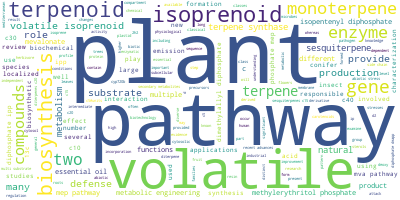

In [24]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

# Prepare data for LDA Analysis

In [25]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['chemical', 'properties', 'diversity', 'volatile', 'isoprenoids', 'lends', 'broad', 'variety', 'biological', 'roles', 'also', 'lends', 'host', 'applications', 'taking', 'advantage', 'natural', 'functions', 'using', 'industrial', 'chemicals', 'chemical', 'feedstocks', 'natural', 'functions', 'include', 'roles', 'insect', 'attractants', 'repellents']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/malli.gelli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 3), (5, 1), (6, 4), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 4), (26, 2), (27, 2), (28, 1), (29, 1)]


# LDA model training

In [27]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.015*"isoprenoids" + 0.014*"plants" + 0.013*"volatile" + 0.011*"pathway" + '
  '0.009*"mediterranean" + 0.007*"abiotic" + 0.007*"biosynthesis" + '
  '0.007*"pathways" + 0.007*"physiological" + 0.007*"review"'),
 (1,
  '0.018*"substrate" + 0.014*"multi" + 0.014*"terpene" + 0.013*"pathway" + '
  '0.010*"responsible" + 0.010*"plants" + 0.008*"synthesis" + '
  '0.008*"metabolic" + 0.007*"plant" + 0.007*"pathways"'),
 (2,
  '0.015*"substrate" + 0.010*"pathway" + 0.009*"terpene" + 0.008*"multi" + '
  '0.008*"phosphate" + 0.006*"responsible" + 0.006*"synthesis" + '
  '0.006*"plants" + 0.006*"synthases" + 0.006*"shoot"'),
 (3,
  '0.013*"plants" + 0.013*"diphosphate" + 0.011*"volatile" + 0.011*"also" + '
  '0.010*"isoprenoids" + 0.010*"pathway" + 0.008*"essential" + '
  '0.008*"applications" + 0.008*"pathways" + 0.007*"engineering"'),
 (4,
  '0.016*"pathway" + 0.012*"plants" + 0.011*"plant" + 0.010*"diphosphate" + '
  '0.010*"volatile" + 0.009*"isoprenoids" + 0.009*"compounds" + '
  '0

# Analyzing LDA model results

In [28]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pyLDAvis.gensim_models
import pyLDAvis
import pickle 

path = '/Users/malli.gelli/Desktop/P503/Topic_modelling'
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join(path+'/results_'+str(num_topics))
LDAvis_data_filepath

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)



/Users/malli.gelli/opt/anaconda3/envs/NLP/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/malli.gelli/opt/anaconda3/envs/NLP/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/malli.gelli/opt/anaconda3/envs/NLP/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/malli.gelli/opt/anaconda3/envs/NLP/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from

In [19]:
pyLDAvis.save_html(LDAvis_prepared, path+'/results_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.034291 -0.037923       1        1  21.556609
6      0.062645 -0.075545       2        1  20.053386
7      0.006100 -0.031781       3        1  14.392697
5      0.082031  0.029621       4        1  12.832462
8     -0.056005  0.015839       5        1  10.434871
0      0.007712  0.058479       6        1   7.824839
3     -0.003323  0.018807       7        1   7.719734
1     -0.078122 -0.018273       8        1   4.987926
2      0.007267  0.017994       9        1   0.098739
9      0.005987  0.022782      10        1   0.098738, topic_info=            Term       Freq      Total Category  logprob  loglift
22   diphosphate  15.000000  15.000000  Default  30.0000  30.0000
252        plant  16.000000  16.000000  Default  29.0000  29.0000
246      pathway  21.000000  21.000000  Default  28.0000  28.0000
68        plants  20.000000  20.000000  Default  27.0000  27.0000
95     volatiles   6.000000   6.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
90         using   0.004831   5.090606  Topic10  -5.9635  -0.0397
171          two   0.005134   9.309809  Topic10  -5.9027  -0.5826
94      volatile   0.005402  16.484438  Topic10  -5.8517  -1.1030
51   isoprenoids   0.004821  12.389774  Topic10  -5.9655  -0.9311
349          mep   0.004793  10.007963  Topic10  -5.9713  -0.7234

[645 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.162354  abiotic
0         2  0.162354  abiotic
0         3  0.162354  abiotic
0         4  0.487063  abiotic
177       1  0.215311     acid
...     ...       ...      ...
173       3  0.193408     well
674       4  0.688404  whereby
716       4  0.581205    woody
716       6  0.581205    woody
858       4  0.563188    xylem

[571 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 7, 8, 6, 9, 1, 4, 2, 3, 10])